In [1]:
from qiskit import *
from qiskit import QuantumCircuit
from qiskit import IBMQ
from qiskit import transpile
import numpy as np
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import AerSimulator

In [2]:
from qiskit import Aer
sv_sim = Aer.get_backend('aer_simulator')

In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
quito = provider.get_backend('ibmq_manila')

In [4]:
manila_sim = AerSimulator.from_backend(quito)

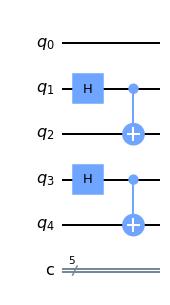

In [5]:
initial_epr = QuantumCircuit(5, 5)

#Hadmard gate on 
initial_epr.h(1)
# #cnot gate on 0 and 1
initial_epr.cx(1, 2)
# #Hadmard gate on 
initial_epr.h(3)
# #cnot gate on 0 and 1
initial_epr.cx(3, 4)
#draw the circuit
# initial_epr.h(0)
# initial_epr.cx(0, 3)
initial_epr.draw('mpl')

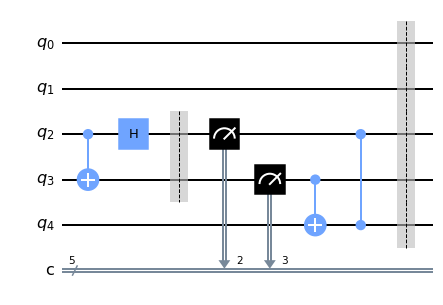

In [6]:
bell_state_measurement = QuantumCircuit(5, 5)

#CNOT gate on 1 and 2
bell_state_measurement.cx(2, 3)
#Hadamard on 1
bell_state_measurement.h(2)
#barrier to seperate measurement
bell_state_measurement.barrier((2, 3))
#add z measurement
bell_state_measurement.measure((2 , 3), (2, 3))
# bell_state_measurement.x(4).c_if(3, 1)
# bell_state_measurement.z(4).c_if(2, 1)
bell_state_measurement.cx(3, 4)
bell_state_measurement.cz(2, 4)
#add barrier so BSM happens before CHSH
bell_state_measurement.barrier(range(5))
bell_state_measurement.draw('mpl')

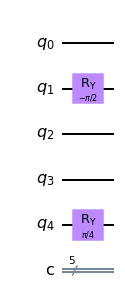

In [7]:
chsh1 = []

rotate_az_cDzx = QuantumCircuit(5, 5)
rotate_az_cDzx.ry(-np.pi/4, 4)
chsh1.append(rotate_az_cDzx)

rotate_az_cEzx = QuantumCircuit(5, 5)
rotate_az_cEzx.ry(np.pi/4, 4)
chsh1.append(rotate_az_cEzx)

rotate_ax_cDzx = QuantumCircuit(5, 5)
rotate_ax_cDzx.ry(-np.pi/2, 1)
rotate_ax_cDzx.ry(-np.pi/4, 4)
chsh1.append(rotate_ax_cDzx)

rotate_ax_cEzx = QuantumCircuit(5, 5)
rotate_ax_cEzx.ry(-np.pi/2, 1)
rotate_ax_cEzx.ry(np.pi/4, 4)
chsh1.append(rotate_ax_cEzx)


rotate_az_cDzy = QuantumCircuit(5, 5)
rotate_az_cDzy.rx(np.pi/4, 4)
chsh1.append(rotate_az_cDzy)

rotate_az_cEzy = QuantumCircuit(5, 5)
rotate_az_cEzy.rx(-np.pi/4, 4)
chsh1.append(rotate_az_cEzy)

rotate_ay_cDzy = QuantumCircuit(5, 5)
rotate_ay_cDzy.rx(np.pi/2, 1)
rotate_ay_cDzy.rx(np.pi/4, 4)
chsh1.append(rotate_ay_cDzy)

rotate_ay_cEzy = QuantumCircuit(5, 5)
rotate_ay_cEzy.rx(np.pi/2, 1)
rotate_ay_cEzy.rx(-np.pi/4, 4)
chsh1.append(rotate_ay_cEzy)


rotate_ax_cDxy = QuantumCircuit(5, 5)
rotate_ax_cDxy.ry(-np.pi/2, 1)
rotate_ax_cDxy.rz(-np.pi/4, 4)
rotate_ax_cDxy.ry(-np.pi/2, 4)
chsh1.append(rotate_ax_cDxy)

rotate_ax_cExy = QuantumCircuit(5, 5)
rotate_ax_cExy.ry(-np.pi/2, 1)
rotate_ax_cExy.rz(np.pi/4, 4)
rotate_ax_cExy.ry(-np.pi/2, 4)
chsh1.append(rotate_ax_cExy)

rotate_ay_cDxy = QuantumCircuit(5, 5)
rotate_ay_cDxy.rx(np.pi/2, 1)
rotate_ay_cDxy.rz(-np.pi/4, 4)
rotate_ay_cDxy.ry(-np.pi/2, 4)
chsh1.append(rotate_ay_cDxy)

rotate_ay_cExy = QuantumCircuit(5, 5)
rotate_ay_cExy.rx(np.pi/2, 1)
rotate_ay_cExy.rz(np.pi/4, 4)
rotate_ay_cExy.ry(-np.pi/2, 4)
chsh1.append(rotate_ay_cExy)

chsh1[3].draw('mpl')

In [8]:
meas = QuantumCircuit(5, 5)
meas.barrier(range(5))
#add z measurement
meas.measure((1, 4), (1, 4))

# meas.measure((1, 2), (1, 2))
meas.draw()

# The Qiskit circuit object supports composition using
# the addition operator.
# print(meas.cregs[0])
# qc = circ.compose(meas)

#drawing the circuit
#qc.draw()

░       
q_0: ─░───────
      ░ ┌─┐   
q_1: ─░─┤M├───
      ░ └╥┘   
q_2: ─░──╫────
      ░  ║    
q_3: ─░──╫────
      ░  ║ ┌─┐
q_4: ─░──╫─┤M├
      ░  ║ └╥┘
c: 5/════╩══╩═
         1  4

In [9]:
bsm2 = QuantumCircuit(5, 5)
#CNOT gate on 1 and 2
bsm2.cx(1, 4)
#Hadamard on 1
bsm2.h(1)
bsm2.barrier(range(5))

In [10]:
#build circuits
quantum_circuits = []
for rot in chsh1:
#     circuit = QuantumCircuit(2, 2)
#     circuit.compose(initialize)
#     circuit.compose(rot)
#     circuit.compose(meas)
    circuit = initial_epr + bell_state_measurement +  rot + meas
    quantum_circuits.append(circuit)
    

C:\Users\ahoyt\AppData\Local\Temp\ipykernel_15540\238850923.py:8: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = initial_epr + bell_state_measurement +  rot + meas


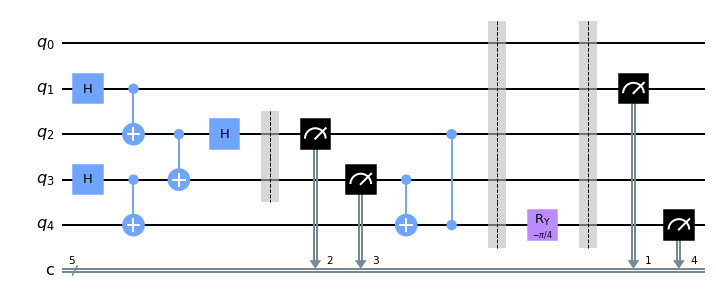

In [11]:
quantum_circuits[0].draw('mpl')

In [16]:
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
qc = QuantumCircuit(1, 1)
qc.ry(np.pi/2, 0)
qc.rz(np.pi/4, 0)
qc.measure(0, 0)
result = sv_sim.run(transpile(qc, sv_sim), shots=1000).result()
# psi  = result.get_statevector(qc)
print(result.get_counts())

{'1': 504, '0': 496}


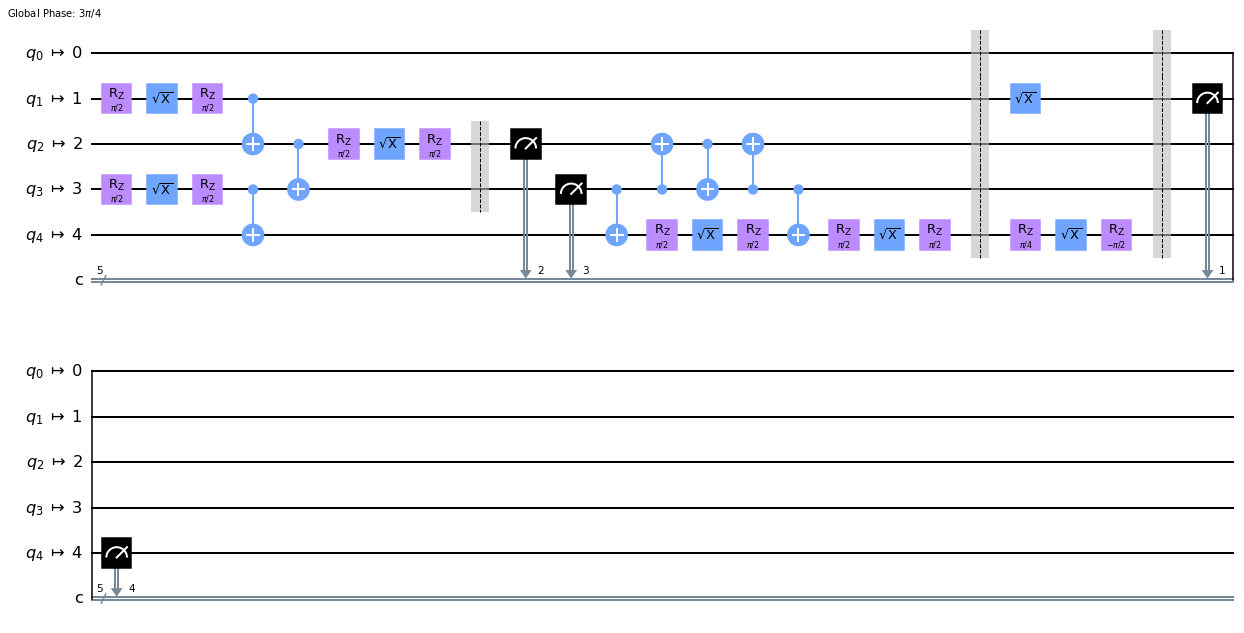

In [57]:
transpile(quantum_circuits, quito)[10].draw('mpl')

In [22]:
# Use Aer's qasm_simulator

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = manila_sim.run(transpile(quantum_circuits, manila_sim), shots=20000)

# job_real = quito.run(transpile(quantum_circuits, quito), shots=20000)
# job_monitor(job_real)

# Grab the results from the job.
result_sim = job_sim.result()
result_real = quito.retrieve_job("631a4d05adebda2da7e6b142").result()

In [23]:
def calc_chsh1(theta_dict):
    zz = theta_dict[0]
    zx = theta_dict[1]
    xz = theta_dict[3]
    xx = theta_dict[2]
    
    no_shots = sum(xx[y] for y in xx)

    chsh1 = 0
    chsh2 = 0
    heads = 0

    for element in zz:
#         print(element)
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1+= parity*zz[element]
        if parity == 1:
            heads += zz[element]

    for element in zx:
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1+= parity*zx[element]
        if parity == 1:
            heads += zz[element]

    for element in xz:
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1-= parity*xz[element]
        if parity == -1:
            heads += zz[element]

    for element in xx:
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1+= parity*xx[element]
        if parity == 1:
            heads += zz[element]
    
    return chsh1 / no_shots, heads

real:
1.7705000000000002
sim:
7.3952
0.6540666666666667
maximum:
8.485281374238571


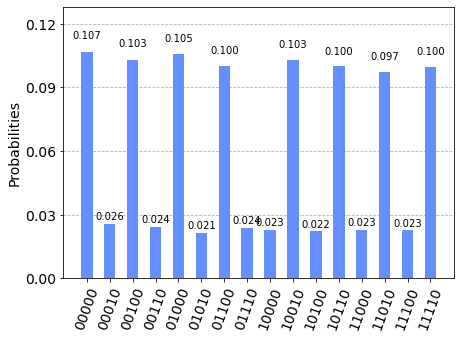

In [51]:
from qiskit.visualization import plot_histogram
def calc_chsh23(theta_dict):
    zz = theta_dict[0]
    zx = theta_dict[1]
    xz = theta_dict[2]
    xx = theta_dict[3]
    
    no_shots = sum(xx[y] for y in xx)

    chsh1 = 0
    chsh2 = 0
    heads = 0

    for element in zz:
#         print(element)
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1+= parity*zz[element]
        if parity == 1:
            heads += zz[element]

    for element in zx:
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1+= parity*zx[element]
        if parity == 1:
            heads += zz[element]

    for element in xz:
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1-= parity*xz[element]
        if parity == -1:
            heads += zz[element]

    for element in xx:
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1+= parity*xx[element]
        if parity == 1:
            heads += zz[element]
    
    return chsh1 / no_shots, heads

print("real:")
print(calc_chsh23(result_real.get_counts()[8:12])[0] + calc_chsh23(result_real.get_counts()[4:8])[0] + calc_chsh1(result_real.get_counts()[0:4])[0])
print("sim:")
heads = calc_chsh23(result_sim.get_counts()[8:12])[1] + calc_chsh23(result_sim.get_counts()[4:8])[1] + calc_chsh1(result_sim.get_counts()[0:4])[1]
print((heads - (20000*12 - heads)) / 10000)
print(heads / (20000*12))
# print("real:")
# print(calc_chsh(result_real.get_counts()))
print("maximum:")
print(6*np.sqrt(2))
plot_histogram(result_sim.get_counts()[0:1])

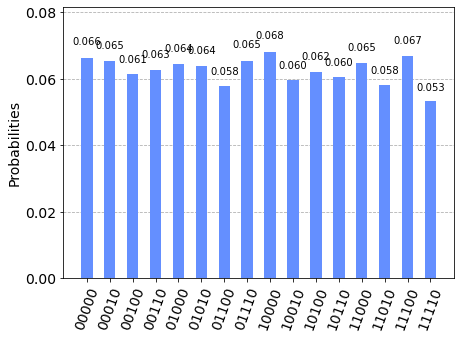

In [60]:
plot_histogram(result_real.get_counts()[10:11])

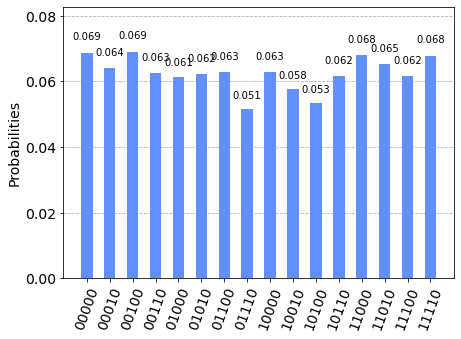

In [56]:
plot_histogram(result_real.get_counts()[7:8])